# Lets Use Libraries!

The objective of the last two days has been to familiarize you with the fundamentals of neural networks: terminology, structure of networks, forward propagation, error/cost functions, backpropagation, epochs, and gradient descent. We have tried to reinforce these topics by requiring to you code some of the simplest neural networks by hand including Perceptrons (single node neural networks) and Multi-Layer Perceptrons also known as Feed-Forward Neural Networks. Continuing to do things by hand would not be the best use of our limited time. You're ready to graduate from doing things by hand and start using some powerful libraries to build cutting-edge predictive models. 

# Keras

> "Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research. Use Keras if you need a deep learning library that:

> Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility).
Supports both convolutional networks and recurrent networks, as well as combinations of the two.
Runs seamlessly on CPU and GPU." 

## Installation

The Keras API is particularly straightforward and it already comes pre-installed on Google Colab! 

<img src="http://www.ryanleeallred.com/wp-content/uploads/2019/04/pip-freeze-keras.png" width="300">

If you're not on Google Colab you'll need to install one of the "backend" engines that Keras runs on top of. I recommend Tensorflow:

> `pip install tensorflow`

Google Colab does not have the latest Tensorflow 2.0 installation, so you'll need to upgrade to that if you want to experiment with it. However Tensorflow 2.0 was just released last month and is still in "alpha" so if you **really** want to use the latest and greatest be prepared for odd bugs that you don't have control over every once in a while. <https://www.tensorflow.org/install/>

In [0]:
# Use pip freeze to see what packages/libraries your notebook has access to
# !pip freeze

## Our First Keras Model - Perceptron, Batch epochs

1) Load Data

2) Define Model

3) Compile Model

4) Fit Model

5) Evaluate Model

### Load Data

Our life is going to be easier if our data is already cleaned up and numeric, so lets use this dataset from Jason Brownlee that is already numeric and has no column headers so we'll need to slice off the last column of data to act as our y values.

In [0]:
# https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv
from google.colab import files
files.upload()

Saving pima-indians-diabetes.csv to pima-indians-diabetes.csv


{'pima-indians-diabetes.csv': b'6,148,72,35,0,33.6,0.627,50,1\n1,85,66,29,0,26.6,0.351,31,0\n8,183,64,0,0,23.3,0.672,32,1\n1,89,66,23,94,28.1,0.167,21,0\n0,137,40,35,168,43.1,2.288,33,1\n5,116,74,0,0,25.6,0.201,30,0\n3,78,50,32,88,31.0,0.248,26,1\n10,115,0,0,0,35.3,0.134,29,0\n2,197,70,45,543,30.5,0.158,53,1\n8,125,96,0,0,0.0,0.232,54,1\n4,110,92,0,0,37.6,0.191,30,0\n10,168,74,0,0,38.0,0.537,34,1\n10,139,80,0,0,27.1,1.441,57,0\n1,189,60,23,846,30.1,0.398,59,1\n5,166,72,19,175,25.8,0.587,51,1\n7,100,0,0,0,30.0,0.484,32,1\n0,118,84,47,230,45.8,0.551,31,1\n7,107,74,0,0,29.6,0.254,31,1\n1,103,30,38,83,43.3,0.183,33,0\n1,115,70,30,96,34.6,0.529,32,1\n3,126,88,41,235,39.3,0.704,27,0\n8,99,84,0,0,35.4,0.388,50,0\n7,196,90,0,0,39.8,0.451,41,1\n9,119,80,35,0,29.0,0.263,29,1\n11,143,94,33,146,36.6,0.254,51,1\n10,125,70,26,115,31.1,0.205,41,1\n7,147,76,0,0,39.4,0.257,43,1\n1,97,66,15,140,23.2,0.487,22,0\n13,145,82,19,110,22.2,0.245,57,0\n5,117,92,0,0,34.1,0.337,38,0\n5,109,75,26,0,36.0,0.546,60,0

In [0]:
# Load Pima Indians Dataset
dataset = numpy.loadtxt('pima-indians-diabetes.csv', delimiter=',')
# Split into X and Y variables
X = dataset[:,0:8]
print(X.shape)
print(X)
Y = dataset[:,-1]
print(Y.shape)
print(Y)

(768, 8)
[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
(768,)
[1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 

### Define Model

In [0]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility
numpy.random.seed(42)

Using TensorFlow backend.


I'll instantiate my model as a "sequential" model. This just means that I'm going to tell Keras what my model's architecture should be one layer at a time.

In [0]:
# https://keras.io/getting-started/sequential-model-guide/
model = Sequential()

Adding a "Dense" layer to our model is how we add "vanilla" perceptron-based layers to our neural network. These are also called "fully-connected" or "densely-connected" layers. They're used as a layer type in lots of other Neural Net Architectures but they're not referred to as perceptrons or multi-layer perceptrons very often in those situations even though that's what they are.

 > ["Just your regular densely-connected NN layer."](https://keras.io/layers/core/)
 
 The first argument is how many neurons we want to have in that layer. To create a perceptron model we will just set it to 1. We will tell it that there will be 8 inputs coming into this layer from our dataset and set it to use the sigmoid activation function.

In [1]:
model.add(Dense(1, input_dim=8, activation="sigmoid"))

# The above is the same as adding these separately:
# model = Sequential()
# model.add(Dense(1, input_dim=8))
# model.add(Activation('sigmoid'))

# If you then want to add more layers to your model:
# with 8 layers and activation function 'relu'
model.add(Dense(8, input_dim=8, activation="relu"))

NameError: ignored

### Compile Model
Using binary_crossentropy as the loss function here is just telling keras that I'm doing binary classification so that it can use the appropriate loss function accordingly. If we were predicting non-binary categories we might assign something like `categorical_crossentropy`. We're also telling keras that we want it to report model accuracy as our main error metric for each epoch. We will also be able to see the overall accuracy once the model has finished training.

In [0]:
# 'binary_crossentropy': tells Keras that we want to predict 'binary' classes as losses are calculated (reporting loss sensible for binary classification)
# while -> 'categorical_crossentropy': for categorical classification
# for list of optimizers: http://keras.io/optimizers/
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
# Param #: number of parameters
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 1)                 9         
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 2         
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


### Fit Model

Lets train it up! `model.fit()` has a `batch_size` parameter that we can use if we want to do mini-batch epochs, but since this tabular dataset is pretty small we're just going to delete that parameter. Keras' default `batch_size` is `None` so omiting it will tell Keras to do batch epochs. 

In [0]:
# Each of the 'epochs' represents 1 feed-forward and 1 backpropagation train cycle
# where each of the weights are updated 1 time in each epoch
model.fit(X, Y, epochs=150)

Epoch 1/150
768/768 [==============================] - 1s 1ms/step - loss: 0.7018 - acc: 0.4245
Epoch 2/150
768/768 [==============================] - 0s 42us/step - loss: 0.6880 - acc: 0.6758
Epoch 3/150
768/768 [==============================] - 0s 43us/step - loss: 0.6848 - acc: 0.6836
Epoch 4/150
768/768 [==============================] - 0s 41us/step - loss: 0.6811 - acc: 0.6836
Epoch 5/150
768/768 [==============================] - 0s 43us/step - loss: 0.6775 - acc: 0.6888
Epoch 6/150
768/768 [==============================] - 0s 41us/step - loss: 0.6731 - acc: 0.6966
Epoch 7/150
768/768 [==============================] - 0s 42us/step - loss: 0.6690 - acc: 0.7057
Epoch 8/150
768/768 [==============================] - 0s 42us/step - loss: 0.6641 - acc: 0.6966
Epoch 9/150
768/768 [==============================] - 0s 43us/step - loss: 0.6615 - acc: 0.7044
Epoch 10/150
768/768 [==============================] - 0s 42us/step - loss: 0.6567 - acc: 0.7214
Epoch 11/150
768/768 [========

### Evaluate Model

In [0]:
# After you fit your model you can print a final score using 'model.evaluate()'
scores = model.evaluate(X, Y)
print(f"{model.metrics_names[1]}: {scores[1]*100}")

768/768 [==============================] - 0s 458us/step
acc: 75.78125


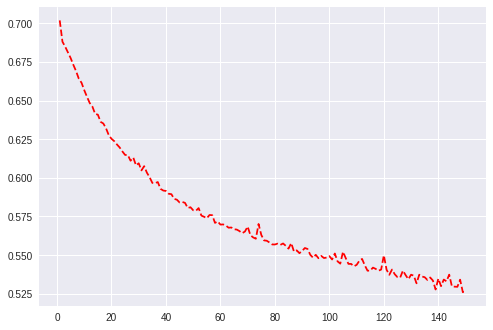

In [0]:
# to get history to create graphs of how loss or accuracy changed overtime (keras.io/callbacks/)
import matplotlib.pyplot as plt
training_loss = history.history['loss']
epoch_count = range(1, len(training_loss) + 1)

plt.plot(epoch_count, training_loss, 'r--')
plt.show();

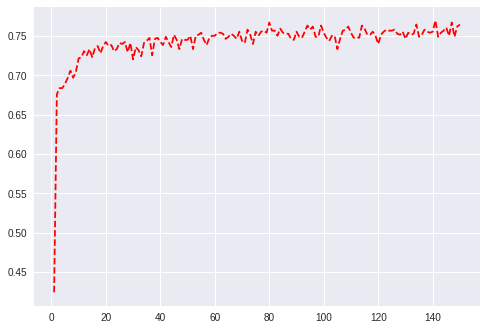

In [0]:
training_accuracy = history.history['acc']
epoch_count = range(1, len(training_accuracy) + 1)

plt.plot(epoch_count, training_accuracy, 'r--')
plt.show();

In [0]:
# dir(history)

# Keras Perceptron Model in 4 lines of code:

In [0]:
model = Sequential()
model.add(Dense(1, input_dim=8, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, Y, epochs=150)

Epoch 1/150
768/768 [==============================] - 0s 415us/step - loss: 7.9936 - acc: 0.3984
Epoch 2/150
768/768 [==============================] - 0s 37us/step - loss: 7.5918 - acc: 0.4336
Epoch 3/150
768/768 [==============================] - 0s 40us/step - loss: 7.0022 - acc: 0.4661
Epoch 4/150
768/768 [==============================] - 0s 42us/step - loss: 6.2710 - acc: 0.4922
Epoch 5/150
768/768 [==============================] - 0s 42us/step - loss: 5.6661 - acc: 0.5469
Epoch 6/150
768/768 [==============================] - 0s 40us/step - loss: 5.2267 - acc: 0.5768
Epoch 7/150
768/768 [==============================] - 0s 46us/step - loss: 4.8732 - acc: 0.6055
Epoch 8/150
768/768 [==============================] - 0s 47us/step - loss: 4.6400 - acc: 0.6250
Epoch 9/150
768/768 [==============================] - 0s 37us/step - loss: 4.5347 - acc: 0.6172
Epoch 10/150
768/768 [==============================] - 0s 41us/step - loss: 4.4936 - acc: 0.6159
Epoch 11/150
768/768 [======

In [0]:
# evaluate the model
scores = model.evaluate(X, Y)
print(f"{model.metrics_names[1]}: {scores[1]*100}")

768/768 [==============================] - 0s 134us/step

acc: 73.83%


### Why are we getting such different results if we re-run the model?

<https://machinelearningmastery.com/randomness-in-machine-learning/>

# What architecture should we try?

In [0]:
model = Sequential()
# 'input_dim': only needed in first layer!
model.add(Dense(3, input_dim=8, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 3)                 27        
_________________________________________________________________
dense_28 (Dense)             (None, 2)                 8         
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 3         
Total params: 38
Trainable params: 38
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.fit(X, Y, epochs=50)

Epoch 1/50
768/768 [==============================] - 0s 49us/step - loss: 0.6499 - acc: 0.6576
Epoch 2/50
768/768 [==============================] - 0s 41us/step - loss: 0.6486 - acc: 0.6589
Epoch 3/50
768/768 [==============================] - 0s 40us/step - loss: 0.6471 - acc: 0.6576
Epoch 4/50
768/768 [==============================] - 0s 41us/step - loss: 0.6458 - acc: 0.6589
Epoch 5/50
768/768 [==============================] - 0s 42us/step - loss: 0.6446 - acc: 0.6602
Epoch 6/50
768/768 [==============================] - 0s 40us/step - loss: 0.6434 - acc: 0.6641
Epoch 7/50
768/768 [==============================] - 0s 41us/step - loss: 0.6423 - acc: 0.6628
Epoch 8/50
768/768 [==============================] - 0s 48us/step - loss: 0.6411 - acc: 0.6602
Epoch 9/50
768/768 [==============================] - 0s 42us/step - loss: 0.6401 - acc: 0.6628
Epoch 10/50
768/768 [==============================] - 0s 43us/step - loss: 0.6390 - acc: 0.6628
Epoch 11/50
768/768 [==================

In [0]:
# evaluate the model
scores = model.evaluate(X, Y)
print(f"{model.metrics_names[1]}: {scores[1]*100}")

768/768 [==============================] - 0s 37us/step
acc: 68.61979166666666


# Activation Functions

What is an activation function and how does it work?

- Takes in a weighted sum of inputs + a bias from the previous layer and outputs an "activation" value.
- Based its inputs the neuron decides how 'activated' it should be. This can be thought of as the neuron deciding how strongly to fire. You can also think of it as if the neuron is deciding how much of the signal that it has received to pass onto the next layer. 
- Our choice of activation function does not only affect signal that is passed forward but also affects the backpropagation algorithm. It affects how we update weights in reverse order since activated weight/input sums become the inputs of the next layer. 


## Step Function

![Heaviside Step Function](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Dirac_distribution_CDF.svg/325px-Dirac_distribution_CDF.svg.png)

All or nothing, a little extreme, which is fine, but makes updating weights through backpropagation impossible. Why? remember that during backpropagation we use derivatives in order to determine how much to update or not update weights. What is the derivative of the step function?

## Linear Function

![Linear Function](http://www.roconnell.net/Parent%20function/linear.gif)

The linear function takes the opposite tact from the step function and passes the signal onto the next layer by a constant factor. There are problems with this but the biggest problems again lie in backpropagation. The derivative of any linear function is a horizontal line which would indicate that we should update all weights by a constant amount every time -which on balance wouldn't change the behavior of our network. Linear functions are typically only used for very simple tasks where interpretability is important, but if interpretability is your highest priority, you probably shouldn't be using neural networks in the first place.

## Sigmoid Function

![Sigmoid Function](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/480px-Logistic-curve.svg.png)

The sigmoid function works great as an activation function! it's continuously differentiable, its derivative doesn't have a constant slope, and having the higher slope in the middle pushes y value predictions towards extremes which is particularly useful for binary classification problems. I mean, this is why we use it as the squishifier in logistic regression as well. It constrains output, but over repeated epochs pushes predictions towards a strong binary prediction. 

What's the biggest problem with the sigmoid function? The fact that its slope gets pretty flat so quickly after its departure from zero. This means that updating weights based on its gradient really diminishes the size of our weight updates as our model gets more confident about its classifications. This is why even after so many iterations with our test score example we couldn't reach the levels of fit that our gradient descent based model could reach in just a few epochs.

## Tanh Function

![Tanh Function](http://mathworld.wolfram.com/images/interactive/TanhReal.gif)

What if the sigmoid function didn't get so flat quite as soon when moving away from zero and was a little bit steeper in the middle? That's basically the Tanh function. The Tanh function can actually be created by scaling the sigmoid function by 2 in the y dimension and subtracting 1 from all values. It has basically the same properties as the sigmoid, still struggles from diminishingly flat gradients as we move away from 0, but its derivative is higher around 0 causing weights to move to the extremes a little faster. 

## ReLU Function

![ReLU Function](https://cdn-images-1.medium.com/max/937/1*oePAhrm74RNnNEolprmTaQ.png)

ReLU stands for Rectified Linear Units it is by far the most commonly used activation function in modern neural networks. It doesn't activate neurons that are being passed a negative signal and passes on positive signals. Think about why this might be useful. Remember how a lot of our initial weights got set to negative numbers by chance? This would have dealt with those negative weights a lot faster than the sigmoid function updating. What does the derivative of this function look like? It looks like the step function! This means that not all neurons are activated. With sigmoid basically all of our neurons are passing some amount of signal even if it's small making it hard for the network to differentiate important and less important connections. ReLU turns off a portion of our less important neurons which decreases computational load, but also helps the network learn what the most important connections are faster. 

What's the problem with relu? Well the left half of its derivative function shows that for neurons that are initialized with weights that cause them to have no activation, our gradient will not update those neuron's weights, this can lead to dead neurons that never fire and whose weights never get updated. We would probably want to update the weights of neurons that didn't fire even if it's just by a little bit in case we got unlucky with our initial weights and want to give those neurons a chance of turning back on in the future.

## Leaky ReLU

![Leaky ReLU](https://cdn-images-1.medium.com/max/1600/1*ypsvQH7kvtI2BhzR2eT_Sw.png)

Leaky ReLU accomplishes exactly that! it avoids having a gradient of 0 on the left side of its derivative function. This means that even "dead" neurons have a chance of being revived over enough iterations. In some specifications the slope of the leaky left-hand side can also be experimented with as a hyperparameter of the model!

In [0]:
# https://keras.io/layers/advanced-activations/

## Softmax Function

![Softmax Function](https://cdn-images-1.medium.com/max/800/1*670CdxchunD-yAuUWdI7Bw.png)

Like the sigmoid function but more useful for multi-class classification problems. The softmax function can take any set of inputs and translate them into probabilities that sum up to 1. This means that we can throw any list of outputs at it and it will translate them into probabilities, this is extremely useful for multi-class classification problems. Like MNIST for example...

## Major takeaways

- ReLU is generally better at obtaining the optimal model fit.
- Sigmoid and its derivatives are usually better at classification problems.
- Softmax for multi-class classification problems (USE IT IN THE LAST LAYER!)

You'll typically see ReLU used for all initial layers and then the final layer being sigmoid or softmax for classification problems. But you can experiment and tune these selections as hyperparameters as well!

## MNIST with Keras 

### This will be a good chance to bring up dropout regularization. :)

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np

In [0]:
# global hyperparameters

batch_size = 64
num_classes = 10
epochs = 20

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten the images
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [0]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(784,)))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 16)                12560     
_________________________________________________________________
dropout_7 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_46 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_8 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_47 (Dense)             (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(x_train, y_train, epochs=epochs, validation_split=.1)
scores = model.evaluate(x_test,y_test)
print(f'{model.metric_names[1]}: {scores[1]*100}')

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 5s 85us/step - loss: 0.6979 - acc: 0.7718 - val_loss: 0.2447 - val_acc: 0.9305
Epoch 2/20
54000/54000 [==============================] - 3s 65us/step - loss: 0.4240 - acc: 0.8701 - val_loss: 0.2132 - val_acc: 0.9408
Epoch 3/20
54000/54000 [==============================] - 3s 62us/step - loss: 0.3740 - acc: 0.8851 - val_loss: 0.1876 - val_acc: 0.9482
Epoch 4/20
54000/54000 [==============================] - 3s 62us/step - loss: 0.3434 - acc: 0.8953 - val_loss: 0.1739 - val_acc: 0.9515
Epoch 5/20
54000/54000 [==============================] - 3s 62us/step - loss: 0.3287 - acc: 0.9014 - val_loss: 0.1656 - val_acc: 0.9520
Epoch 6/20
54000/54000 [==============================] - 3s 65us/step - loss: 0.3108 - acc: 0.9059 - val_loss: 0.1693 - val_acc: 0.9525
Epoch 7/20
54000/54000 [==============================] - 3s 64us/step - loss: 0.2964 - acc: 0.9098 - val_loss: 0.1563 - val_acc:

AttributeError: ignored

## What if we use dropout techniques to prevent overfitting? How does that affect our model?

![Regularization](https://upload.wikimedia.org/wikipedia/commons/thumb/0/02/Regularization.svg/354px-Regularization.svg.png)

In [0]:
### Try it with dropout